In [105]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import random

import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dropout, BatchNormalization

In [107]:
import keras
import sklearn
import pandas
import numpy
import matplotlib
import tensorflow
import seaborn

print('numpy.version.version', numpy.version.version)
print('keras.__version__', keras.__version__)
print('sklearn.__version__', sklearn.__version__)
print('matplotlib.__version__', matplotlib.__version__)
print('pandas.__version__', pandas.__version__)
print('tensorflow.__version__', tensorflow.__version__)
print('seaborn.__version__', seaborn.__version__)

numpy.version.version 1.18.1
keras.__version__ 2.4.3
sklearn.__version__ 0.23.2
matplotlib.__version__ 3.1.3
pandas.__version__ 1.0.2
tensorflow.__version__ 2.3.1
seaborn.__version__ 0.10.0


# 1. 파일 불러오기

In [3]:
#Press
path1 = 'D:/업무 파일/5. Digital tech 대학_AI/AI 고급 문제 해결 과정/VT3_PressNew_Summary_2.xlsx'

#Oven
path2 ='D:/업무 파일/5. Digital tech 대학_AI/AI 고급 문제 해결 과정/VT3_OvenNew_Summary.xlsx'

#Cooling
path3 = 'D:/업무 파일/5. Digital tech 대학_AI/AI 고급 문제 해결 과정/VT3_CoolingNew_Summary.xlsx'

#Thickness 
path4 = 'D:/업무 파일/5. Digital tech 대학_AI/AI 고급 문제 해결 과정/VT3_Thickness_Data_Sum_30T.xlsx'

x = 'Sheet0'
df1 = pd.read_excel(path1, sheet_name = x, header = 0)
df2 = pd.read_excel(path2, sheet_name = x, header = 0)
df3 = pd.read_excel(path3, sheet_name = x, header = 0)
df4 = pd.read_excel(path4, sheet_name = x, header = 0)

# 2. 탐색적 자료분석

In [120]:
Flatness = df4.iloc[:,7:19] #Measure
Flatness

,MEASURE1,MEASURE2,MEASURE3,MEASURE4,MEASURE5,MEASURE6,MEASURE7,MEASURE8,MEASURE9,MEASURE10,MEASURE11,MEASURE12
0,30.65,33.06,34.55,36.67,29.38,31.70,33.46,35.06,30.36,31.13,33.27,34.80
1,30.79,31.16,30.93,32.89,30.39,33.65,32.43,31.39,33.62,32.48,33.27,31.85
2,31.40,33.03,33.95,36.92,31.70,33.26,34.21,34.66,33.59,34.13,35.48,34.30
3,31.32,32.15,32.09,33.11,30.56,30.98,31.18,31.56,30.89,31.12,31.64,30.66
4,31.62,33.10,33.64,35.05,31.52,32.59,33.17,33.79,32.13,32.38,34.15,32.82
...,...,...,...,...,...,...,...,...,...,...,...,...
6087,37.25,36.22,36.36,36.11,35.58,35.41,34.88,34.62,37.32,36.07,35.27,33.78
6088,37.23,36.63,35.68,36.44,35.25,35.91,36.36,34.96,36.85,35.21,35.48,34.08
6089,37.76,37.37,37.29,37.79,33.30,34.45,34.32,34.41,34.05,32.91,33.80,32.54
6090,37.71,36.86,36.31,37.27,33.91,35.51,33.86,34.37,34.73,33.77,33.43,32.29


In [121]:
Thickness = df4.iloc[:,19:43]
Thickness_Min = df4.iloc[:,19:43].min(axis=1)
Thickness_Max = df4.iloc[:,19:43].max(axis=1)
ThickGap = Thickness_Max - Thickness_Min
Thickness

,THICKNESS1,THICKNESS2,THICKNESS3,THICKNESS6,THICKNESS7,THICKNESS8,THICKNESS11,THICKNESS12,THICKNESS13,THICKNESS16,...,THICKNESS23,THICKNESS26,THICKNESS27,THICKNESS28,THICKNESS31,THICKNESS32,THICKNESS33,THICKNESS36,THICKNESS37,THICKNESS38
0,36.60468,35.47038,35.30898,35.69979,34.18299,34.61924,34.65936,33.30635,33.75486,33.58646,...,31.24421,32.68530,31.16050,31.46264,32.44990,30.11875,31.25648,30.82900,29.86701,30.49501
1,31.63573,31.78007,32.28111,31.53835,31.71601,32.76640,31.02801,31.57913,32.59647,30.36087,...,31.57428,30.74372,31.65456,32.55245,30.92800,31.55590,32.94997,30.93994,31.56466,33.13451
2,35.33375,36.08113,35.78975,34.64748,35.07555,35.99496,33.95569,34.41056,35.43108,32.91232,...,33.92348,32.38923,33.32502,34.23915,32.03579,32.51413,33.96074,31.15548,32.25378,33.49755
3,32.84482,32.49400,31.78867,32.73873,32.25832,32.12485,32.38921,31.95623,31.63409,31.31399,...,30.51679,31.93032,30.95958,31.26309,31.94946,30.61946,31.43342,31.53131,30.70128,31.29033
4,34.64240,34.25532,34.36429,34.48964,33.69512,34.29958,33.95885,33.37014,33.65661,33.40995,...,32.29580,32.95830,32.49748,32.66445,32.71958,32.10849,32.55072,31.75230,31.79159,32.29654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6087,34.98696,34.36498,34.42431,35.21888,34.72325,34.75359,35.33548,34.86869,34.94247,35.37972,...,34.90012,36.32636,36.04465,36.01470,36.91262,36.56657,36.59215,37.32878,37.06224,37.20317
6088,35.47617,34.26205,34.06248,35.68096,34.58562,34.53176,35.86871,35.04769,34.81478,35.90736,...,34.48240,36.74834,34.97767,35.64781,37.12488,35.22807,36.13135,37.41441,36.14156,36.51539
6089,37.64649,35.21636,33.48510,37.45570,34.92134,33.79554,37.24279,34.95771,33.59488,36.96345,...,32.60964,37.23217,34.97415,33.51511,37.41725,35.29675,33.73330,37.60121,35.60707,33.73255
6090,36.39094,34.32858,32.79010,36.32341,34.28066,33.10986,36.24437,34.26768,33.02114,36.13119,...,32.77770,36.79210,34.81617,33.66515,37.22184,35.25689,34.18114,37.63541,35.73353,34.44334


# Thickness Histogram

Thickness Total Mean :  33.73171240971769
Thickness Total Variation :  0.005158204466919095


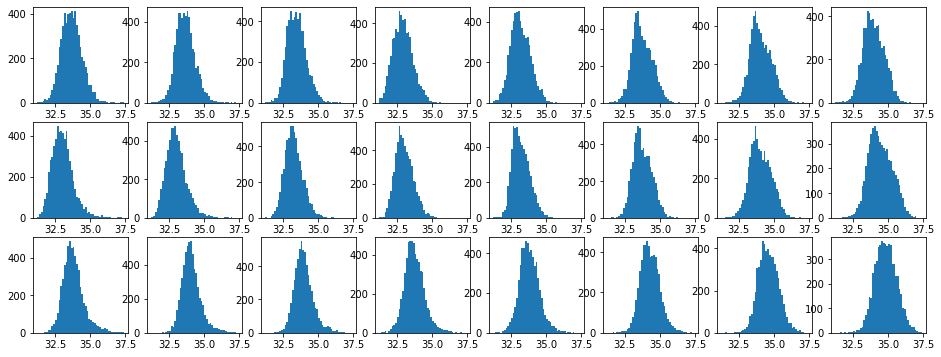

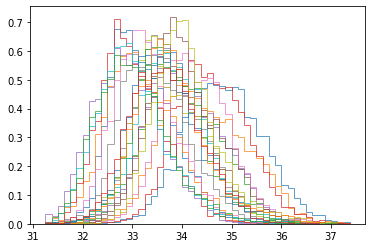

In [138]:
fig, axs = plt.subplots(3,8,figsize = (16,6))
list = []
for i in range(250, 300):
    list.append(i * 0.125)

for i in range(0,24):
    x1 = 2-i%3
    x2 = 7-i//3
    axs[x1, x2].hist(Thickness.iloc[:,i], list)
print('Thickness Total Mean : ', np.mean(Thickness).mean())
print('Thickness Total Variation : ', np.var(Thickness).var())

fig = plt.figure()
for i in range(0,24):
    plt.hist(Thickness.iloc[:,i], list, density=True, alpha=0.7, histtype='step')
plt.show()

# Flatness Histogram

Flatness Total Mean :  31.67827396585686
Flatness Total Variation :  6.608841740019566


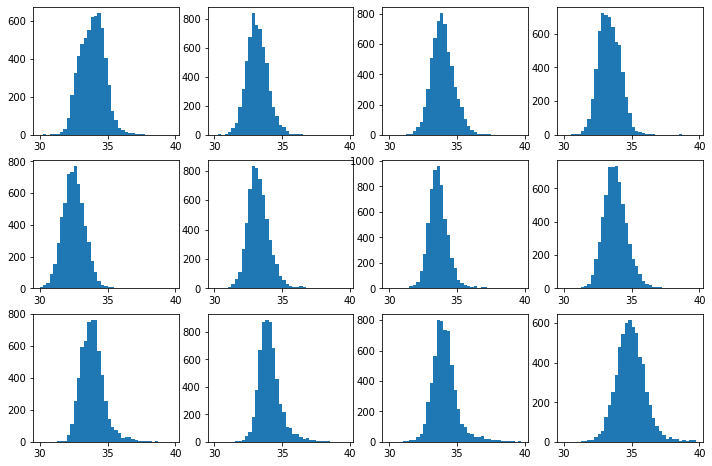

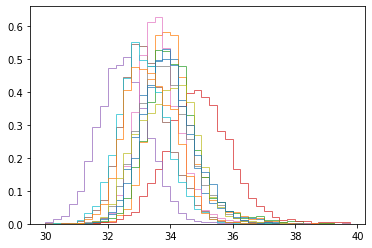

In [139]:
#custom_xlim = (30, 40)
#custom_ylim = (0,350)
#plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim)
fig, axs = plt.subplots(3,4,figsize = (12,8))
list = []
for i in range(120, 160):
    list.append(i * 0.25)

for i in range(0,12):
    x1 = 2 - i//4
    x2 = i%4
    axs[x1, x2].hist(Flatness.iloc[:,i], list)#, rwidth=0.9)
print('Flatness Total Mean : ', np.mean(Flatness).mean())
print('Flatness Total Variation : ', np.var(Flatness).var())

fig = plt.figure()
for i in range(0,12):
    plt.hist(Flatness.iloc[:,i], list, density=True, alpha=0.7, histtype='step')
plt.show()

# Bending Histogram

* 평균 2.86 mm 벤딩이 발생하고 있음
* spec in.이 폭 2mm, 길이 3mm 이며, 다수 제품이 3mm 이상임을 확인

Bending Total Mean :  2.8607797110965185
Bending Total Variation :  0.9284290867321543


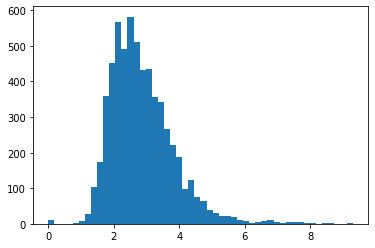

In [159]:
Bending = df4.iloc[:,43:55].max(axis = 1)
plt.hist(Bending,50)
print('Bending Total Mean : ', np.mean(Bending))
print('Bending Total Variation : ', np.var(Bending))

# 공정 조건과 품질 인자 간 상관관계

* 품질인자(Bending)과 상관관계가 높은 변수는 없음을 확인 함

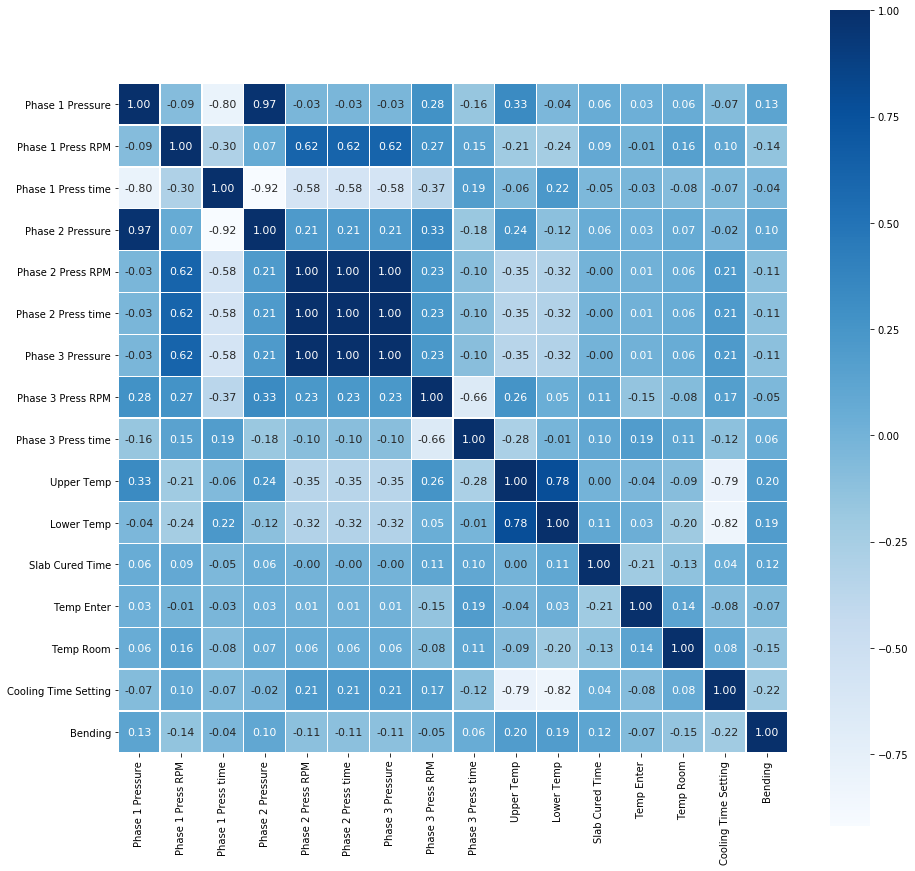

In [154]:
cor_list =  [#press 
            'Phase 1 Pressure', 'Phase 1 Press RPM', 'Phase 1 Press time',
            'Phase 2 Pressure', 'Phase 2 Press RPM', 'Phase 2 Press time',
            'Phase 3 Pressure', 'Phase 3 Press RPM', 'Phase 3 Press time', 
            #oven
            'Upper Temp', 'Lower Temp', 'Slab Cured Time',
            #cooling
            'Temp Enter', 'Temp Room', 'Cooling Time Setting',
            #quality
            'Bending'
            ]
df_cor = pd.DataFrame()
df_cor[cor_list] = Preprocess_data[cor_list]
df_cor = df_cor.corr()
plt.figure(figsize=(15,15))
df_heatmap = sns.heatmap(df_cor, cbar = True, linewidths = 0.3, annot = True, annot_kws={'size':11}, 
                         fmt = '.2f',square = True, cmap = 'Blues')

# 3. 데이터 전처리

In [141]:
df_copy2 = df2.copy()
# one hot endcode
df_OFN_copy = pd.get_dummies(df_copy2['Oven Floor  Name'])
df_copy2 = pd.concat([df_copy2, df_OFN_copy], axis = 1)
df_copy2 = df_copy2.drop(['Oven Floor  Name'], axis=1)
df_copy2 = df_copy2.drop(['Color'], axis=1)
df_copy2 = df_copy2.drop(['Measurement Time'], axis=1)
df_copy2 = df_copy2.drop(['Slab Input Time'], axis=1)
df_copy2 = df_copy2.drop(['Slab End Time'], axis=1)
df_copy2 = df_copy2.drop(['Upper Setting'], axis=1)
df_copy2 = df_copy2.drop(['Lower Setting'], axis=1)


df_copy3 = df3.copy()
# one hot endcode
df_CFN_copy = pd.get_dummies(df_copy3['Cooling Floor Name'])
df_copy3 = pd.concat([df_copy3, df_CFN_copy], axis = 1)
df_copy3 = df_copy3.drop(['Cooling Floor Name'], axis=1)
df_copy3 = df_copy3.drop(['Measurement Time'], axis=1)
df_copy3 = df_copy3.drop(['Color'], axis=1)
df_copy3 = df_copy3.drop(['Slab Input Time'], axis=1)
df_copy3 = df_copy3.drop(['Slab End Time'], axis=1)
df_copy3 = df_copy3.drop(['Temp Exit'], axis=1)
df_copy3 = df_copy3.drop(['Temp Setting'], axis=1)
df_copy3 = df_copy3.drop(['Temp Slab'], axis=1)
df_copy3 = df_copy3.drop(['Slab Cooling Time'], axis=1)

df_copy4 = pd.DataFrame()
df_copy4['Slab No'] = df4['Slab No']
df_copy4['Bending'] = df4['Bending']

In [144]:
# Sheet 합침
df_summary = pd.merge(df_copy2, df_copy3, on = 'Slab No', how='inner')
df_summary = pd.merge(df_summary, df1, on = 'Slab No', how='inner')
df_summary = pd.merge(df_summary, df_copy4, on = 'Slab No', how='inner')
df_summary = df_summary.drop(['Slab No'], axis=1)

# 불필요한 열 삭제
df_summary = df_summary.drop(['Measurement Time'], axis=1)
df_summary = df_summary.drop(['Phase 4 Pressure'], axis=1)
df_summary = df_summary.drop(['Phase 4 Press RPM'], axis=1)
df_summary = df_summary.drop(['Phase 4 Press time'], axis=1)
df_summary = df_summary.drop(['Phase 4<br/>Acceleration Time'], axis=1)

df_summary = df_summary.drop(['Phase 5 Pressure'], axis=1)
df_summary = df_summary.drop(['Phase 5 Press RPM'], axis=1)
df_summary = df_summary.drop(['Phase 5 Press time'], axis=1)
df_summary = df_summary.drop(['Phase 5<br/>Acceleration Time'], axis=1)

# 20 초과 값 삭제
df_summary = df_summary[df_summary['Chamer vacuum<br/>pressure'] <= 20]

#Color Encode
df_F_copy = pd.get_dummies(df_summary['Color'])
df_summary = pd.concat([df_F_copy, df_summary], axis = 1)
df_summary = df_summary.drop(['Color'], axis=1)

Save_File = 'D:/업무 파일/5. Digital tech 대학_AI/AI 고급 문제 해결 과정/VT3_Final_4Process_New.xlsx'
df_summary.to_excel(Save_File, sheet_name = 'Sheet0')
print(df_summary.shape)
print('Fin')

(292, 72)
Fin


# 이상치 제거

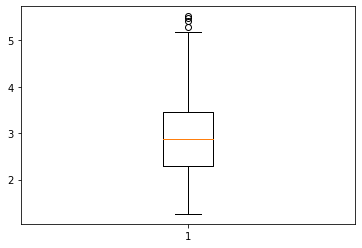

In [145]:
plt.boxplot(df_summary['Bending'])
plt.show()

In [146]:
#이상치 제거
def remove_outlier_test(d_cp, column):
    fraud_column_data = d_cp[column]
    quan_25  =np.percentile(fraud_column_data, 25)
    quan_75  =np.percentile(fraud_column_data, 75)
    iqr = quan_75 - quan_25
    iqr = iqr*1.5
    lowest = quan_25 - iqr
    highest = quan_75 + iqr
    outlier_index = fraud_column_data[(fraud_column_data < lowest) | (fraud_column_data > highest)].index
    print(d_cp.shape)
    print(len(outlier_index))
    d_cp.drop(outlier_index, axis = 0, inplace = True)
    print(d_cp.shape)
    return d_cp

Preprocess_data = remove_outlier_test(df_summary, 'Bending')
Preprocess_data.shape

(292, 72)
4
(288, 72)


(288, 72)

# Data Augmentation

In [96]:
Augmentation_data = pd.DataFrame()
for x in range(50):
    Augmentation_data = pd.concat([Augmentation_data, Preprocess_data], axis = 0)
    
print(Augmentation_data.shape)
print('Range : ', len(Augmentation_data))

mu, sigma = 1.0, 0.05/3

for x in range(len(Augmentation_data)):
    
    Augmentation_data.iloc[x,7:10] = Augmentation_data.iloc[x,7:10] * np.random.normal(mu, sigma)  
    Augmentation_data.iloc[x,27:31] = Augmentation_data.iloc[x,27:31] * np.random.normal(mu, sigma)
    Augmentation_data.iloc[x,55:73] = Augmentation_data.iloc[x,55:73] * np.random.normal(mu, sigma)

print('Fin')

(14250, 73)
Range :  14250
Fin


In [ ]:
Augmentation_data = pd.DataFrame()
for x in range(50):
    Augmentation_data = pd.concat([Augmentation_data, Preprocess_data], axis = 0)
    
print(Augmentation_data.shape)
print('Range : ', len(Augmentation_data))

mu, sigma = 1.0, 0.05/3

for x in range(len(Augmentation_data)):
    for i in range(7:11):
        Augmentation_data.iloc[x,i] *= np.random.normal(mu, sigma)  
    for j in range(27:32):
        Augmentation_data.iloc[x,j] *= np.random.normal(mu, sigma)  
    for k in range(55:74):
        Augmentation_data.iloc[x,k] *= np.random.normal(mu, sigma)  
    
print('Fin')

# Feature Engineering

In [98]:
Augmentation_data['Temp Gap'] = Augmentation_data['Upper Temp'] - Augmentation_data['Lower Temp'] 
Augmentation_data['Press Time Gap 12'] = Augmentation_data['Phase 2 Press time'] - Augmentation_data['Phase 1 Press time']
Augmentation_data['Press Time Gap 23'] = Augmentation_data['Phase 3 Press time'] - Augmentation_data['Phase 2 Press time']
Augmentation_data['Press Time Gap 13'] = Augmentation_data['Phase 3 Press time'] - Augmentation_data['Phase 1 Press time']
Augmentation_data['Press Time Gap Ratio 12'] = round(Augmentation_data['Phase 2 Press time']/Augmentation_data['Phase 1 Press time'], 4)
Augmentation_data['Press Time Gap Ratio 23'] = round(Augmentation_data['Phase 3 Press time']/Augmentation_data['Phase 2 Press time'], 4)
Augmentation_data['Press Time Gap Ratio 13'] = round(Augmentation_data['Phase 3 Press time']/Augmentation_data['Phase 1 Press time'], 4)

Augmentation_data['Press RPM Gap 12'] = Augmentation_data['Phase 2 Press RPM'] - Augmentation_data['Phase 1 Press RPM']
Augmentation_data['Press RPM Gap 23'] = Augmentation_data['Phase 3 Press RPM'] - Augmentation_data['Phase 2 Press RPM']
Augmentation_data['Press RPM Gap 13'] = Augmentation_data['Phase 3 Press RPM'] - Augmentation_data['Phase 1 Press RPM']
Augmentation_data['Press RPM Gap Ratio 12'] = round(Augmentation_data['Phase 2 Press RPM']/Augmentation_data['Phase 1 Press RPM'], 4)
Augmentation_data['Press RPM Gap Ratio 23'] = round(Augmentation_data['Phase 3 Press RPM']/Augmentation_data['Phase 2 Press RPM'], 4)
Augmentation_data['Press RPM Gap Ratio 13'] = round(Augmentation_data['Phase 3 Press RPM']/Augmentation_data['Phase 1 Press RPM'], 4)

print(Augmentation_data.shape)

Save_File = 'D:/업무 파일/5. Digital tech 대학_AI/AI 고급 문제 해결 과정/VT3_Augmentation_Final.xlsx'
df_copy.to_excel(Save_File, sheet_name = 'Sheet0')

print('Fin')

(14250, 85)
Fin
